## Yelp Customer Rating Prediction

### Case Summary

*yelp.com* is a consumer review website for businesses and services. The review is used by other customers to evaluate and make choices. The challenge now is that the businesses would like to understand how to improve and their key metric, customer's rating, is mostly influenced by the reviwes and what is contained in them. for example, a review like

> "They have the best happy hours, the food is great, and service is even better. When it is winter we become regulars" 

The customer gave a 4 star along with this rating. By reading this review, we can easily understand that words like `"best", "great", "better"` are all words that can positively impact the rating as there is higher satisfaction. But it is not easy to read millions of reviews and make an assesment on them. It is a time and resource consuming work.

#### The dataset 
The dataset contains 10,000 reviews from Pheonix, Arizona with the following fields
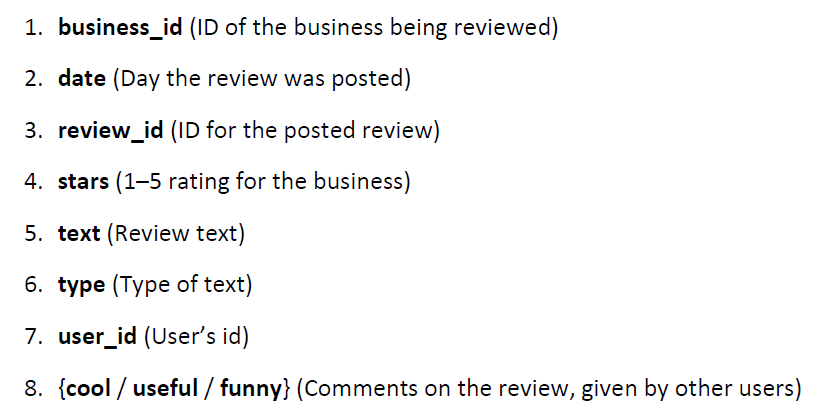

The objective now is to predict the Yelp review rating.

### Solution

The challenge now here is to use qualitative information or more accurately, text data to predict the value of the rating. It is easy to understand this is a classification problem as there are only 5 values that the rating can take. Modern analytical tools have evolved well to handle the text data to make them a valuble input for analysis. The method of how it is done will be explained as we progress

Our first task is to import the data and load the necessary libraries

In [2]:
library(data.table)
library(dplyr)
library(tidytext)
library(rsample)
library(stringr)
library(ggplot2)
library(caret)
library(fastDummies)
library(ggthemes)

yelp <- fread("yelp.csv")

Let's examine the file

In [5]:
str(yelp)

Classes 'data.table' and 'data.frame':	10000 obs. of  10 variables:
 $ business_id: chr  "9yKzy9PApeiPPOUJEtnvkg" "ZRJwVLyzEJq1VAihDhYiow" "6oRAC4uyJCsJl1X0WZpVSA" "_1QQZuf4zZOyFCvXc0o6Vg" ...
 $ date       : chr  "2011-01-26" "2011-07-27" "2012-06-14" "2010-05-27" ...
 $ review_id  : chr  "fWKvX83p0-ka4JS3dc6E5A" "IjZ33sJrzXqU-0X6U8NwyA" "IESLBzqUCLdSzSqm0eCSxQ" "G-WvGaISbqqaMHlNnByodA" ...
 $ stars      : int  5 5 4 5 5 4 5 4 4 5 ...
 $ text       : chr  "My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sit"| __truncated__ "I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone."| __truncated__ "love the gyro plate. Rice is so good and I also dig their candy selection :)" "Rosie, Dakota, and I LOVE Chaparral Dog Park!!! It's very convenient and surrounded by a lot of paths, a desert"| __truncated__ ...
 $ type       : chr  "review" "review" "review" "review" ...
 $ user_

In [6]:
head(yelp)

business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,"My wife took me here on my birthday for breakfast and it was excellent. The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure. Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning. It looked like the place fills up pretty quickly so the earlier you get here the better. Do yourself a favor and get their Bloody Mary. It was phenomenal and simply the best I've ever had. I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it. It was amazing. While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious. It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete. It was the best """"toast"""" I've ever had. Anyway, I can't wait to go back!",review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,"I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that. In any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we'll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small """"Here's The Beef"""" pizza so we can both try them. The calzone was huge and we got the smallest one (personal) and got the small 11"""" pizza. Both were awesome! My friend liked the pizza better and I liked the calzone better. The calzone does have a sweetish sauce but that's how I like my sauce! We had to box part of the pizza to take it home and we were out the door by 6:42. So, everything was great and not like these bad reviewers. That goes to show you that you have to try these things yourself because all these bad reviewers have some serious issues.",review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I also dig their candy selection :),review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!! It's very convenient and surrounded by a lot of paths, a desert xeriscape, baseball fields, ballparks, and a lake with ducks. The Scottsdale Park and Rec Dept. does a wonderful job of keeping the park clean and shaded. You can find trash cans and poopy-pick up mitts located all over the park and paths. The fenced in area is huge to let the dogs run, play, and sniff!",review,uZetl9T0NcROGOyFfughhg,1,2,0
6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,"General Manager Scott Petello is a good egg!!! Not to go into detail, but let me assure you if you have any issues (albeit rare) speak with Scott and treat the guy with some respect as you state your case and I'd be surprised if you don't walk out totally satisfied as I just did. Like I always say..... """"Mistakes are inevitable, it's how we recover from them that is important""""!!! Thanks to Scott and his awesome staff. You've got a customer for life!! .......... :^)",review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full windows and earthy wooden walls give a feeling of warmth inside this restaurant perched in the middle of a farm. The restaurant seemed fair

 From looking at all the variables, it is certain that the date and type variable is not much relevance for the analysis, so it is removed

In [7]:
yelp$date <- NULL
yelp$type <- NULL

Let's see what cool, useful and funny variables tell us

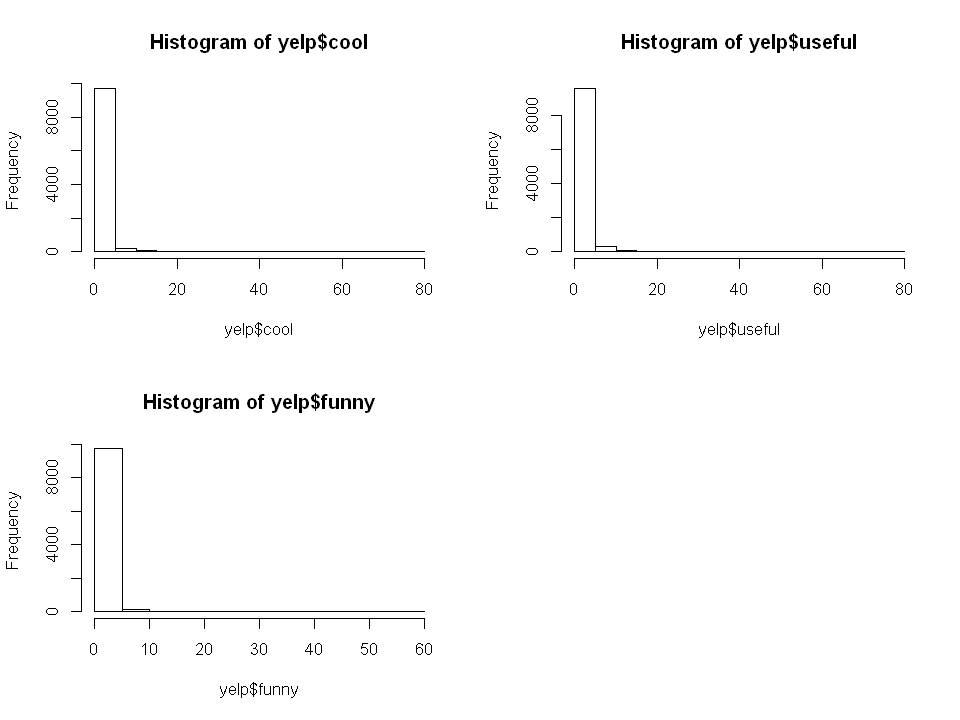

In [17]:
library(repr)
options(repr.plot.width=8, repr.plot.height=6)
par(mfrow=c(2,2))

hist(yelp$cool)
hist(yelp$useful)
hist(yelp$funny)

par(mfrow=c(1,1))

The histogram shows that there are a lot of zero values in them. The same at an overall level for all cool,useful and funny is examined too

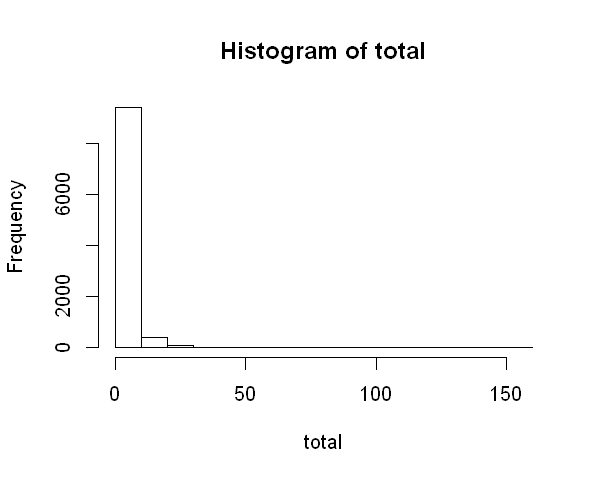

In [19]:
total <- yelp$cool+yelp$useful+yelp$funny
options(repr.plot.width=5, repr.plot.height=4)
hist(total)

In [20]:
data.table(prop.table(table(total))*100)

total,N
0,36.12
1,19.44
2,10.82
3,9.24
4,5.63
5,3.87
6,2.81
7,2.16
8,1.54
9,1.14


36% of the total reviews have zeros as as cool, funny and useful

But how are they related with the stars?

In [22]:
yelp$stars <- as.character(yelp$stars)

summary(aov(yelp$stars~yelp$cool))
summary(aov(yelp$stars~yelp$useful))
summary(aov(yelp$stars~yelp$funny))

              Df Sum Sq Mean Sq F value   Pr(>F)    
yelp$cool      1     41   40.74   27.69 1.45e-07 ***
Residuals   9998  14711    1.47                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

              Df Sum Sq Mean Sq F value Pr(>F)  
yelp$useful    1      8   8.132   5.515 0.0189 *
Residuals   9998  14744   1.475                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

              Df Sum Sq Mean Sq F value   Pr(>F)    
yelp$funny     1     55   55.44   37.72 8.48e-10 ***
Residuals   9998  14696    1.47                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

ANOVA shows that the cool, useful and funny variables are significantly different between the star ratings. Which means that there is a relationship between them and star ratings.

Inorder to analyze the reviews, some data engineering or manipulation steps needs to be done.

In [28]:
r_words <- yelp[,c(1:4)]
r_words <- unnest_tokens(r_words,word,text)
r_words <- r_words[!word %in% stop_words$word]
r_words <- r_words[str_detect(r_words$word,"^[a-z']+$")]

Let me explain what is happening above.
1. We take the columns `business_id, review_id, stars and text`
2. We tokenize the words in the text. Tokenisaztion in basic terms means taking a word and spliting it into letters. Each reviwe is split like this and the respective values of the other columns are also retained for each review.
3. We then remove all the stop words available in the stop_words dictionary. These include words like "a","and","to",etc. these are words that don't necessarily mean anything in influencing the review.
4. The last step removes any numbers and keeps only words in small cases across all the reviews.

Now that the cleaning is done, the sentiment value for each of the words is ascertained using the AFINN Lexicon and the sentiments from nrc is taken

In [38]:
sentiments <- as.data.table(sentiments)
AFINN <- sentiments[lexicon == "AFINN",c(1,4),]
NRC <- sentiments[lexicon == "nrc",c(1,2),]

r_senti <- data.table(inner_join(r_words,AFINN,by="word"))
r_senti_1 <- r_senti[,.(sentiment = mean(score)),by=.(review_id,stars)]
r_senti_1 <- r_senti_1[,c(1,3),]

r_senti <- data.table(inner_join(r_senti,NRC,by="word"))
r_senti <- dummy_cols(r_senti,"sentiment")
r_senti_2 <- r_senti[,.(sentiment_joy=sum(sentiment_joy),
                        sentiment_positive=sum(sentiment_positive),
                        sentiment_trust=sum(sentiment_trust),
                        sentiment_anticipation=sum(sentiment_anticipation),
                        sentiment_anger= sum(sentiment_anger),
                        sentiment_disgust=sum(sentiment_disgust),
                        sentiment_fear=sum(sentiment_fear),
                        sentiment_negative=sum(sentiment_negative),
                        sentiment_sadness=sum(sentiment_sadness)),by=.(review_id,stars)]
r_senti_2$stars <- NULL

The r_senti_1 is a table of review id's with their corresponding mean sentiment score for all the words. Here, we used an AFINN lexicon to find a sentiment score for various words ranging between +5 and -5. The score for each word was calculated and the mean value for each reviwe was taken.

r_senti_2 table used the NRC dictionary. The NRC dictionary has 9 different types of feelings associated for each word. A dummy column for each of the word is created and a sum of all those scores is calculated for each review.

The average sentiment score and the sentiment is added up to the main yelp data.

In [40]:
yelp <- data.table(inner_join(yelp,r_senti_1,by="review_id"))
yelp <- data.table(inner_join(yelp,r_senti_2,by="review_id"))

The relationship between average sentiment score and the sentiment words with the Star ratings is examined

                 Df Sum Sq Mean Sq F value Pr(>F)    
yelp$sentiment    1   3131  3130.8    2810 <2e-16 ***
Residuals      8805   9809     1.1                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

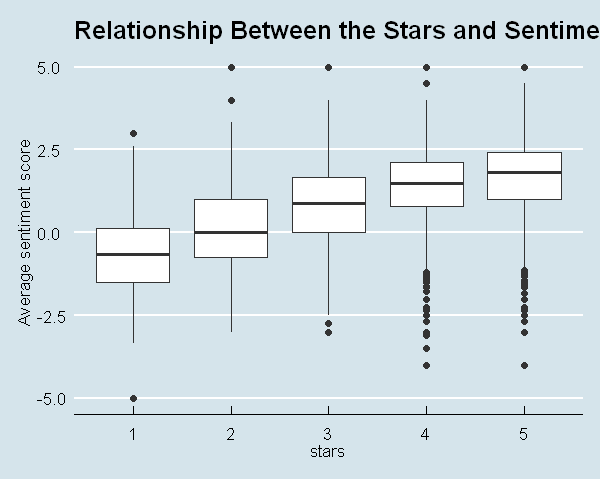

In [58]:
summary(aov(yelp$stars~yelp$sentiment))

ggplot(yelp, aes(stars, sentiment, group = stars)) +
  geom_boxplot() +
  ylab("Average sentiment score")+
  ggtitle("Relationship Between the Stars and Sentiment Score")+
  theme_economist()

The ANOVA establishes that there is a relationship between the average sentiment score and the star rating. The plot confirms this relationship, but there does seem to be a lot of outliers with lower sentiment scores for 4&5 stars

In [60]:
summary(aov(yelp$stars~yelp$sentiment_joy))
summary(aov(yelp$stars~yelp$sentiment_positive))
summary(aov(yelp$stars~yelp$sentiment_trust))
summary(aov(yelp$stars~yelp$sentiment_anticipation))
summary(aov(yelp$stars~yelp$sentiment_anger))
summary(aov(yelp$stars~yelp$sentiment_disgust))
summary(aov(yelp$stars~yelp$sentiment_fear))
summary(aov(yelp$stars~yelp$sentiment_negative))
summary(aov(yelp$stars~yelp$sentiment_sadness))

                     Df Sum Sq Mean Sq F value Pr(>F)    
yelp$sentiment_joy    1    384   384.1   269.3 <2e-16 ***
Residuals          8805  12556     1.4                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                          Df Sum Sq Mean Sq F value Pr(>F)    
yelp$sentiment_positive    1    322   321.6   224.4 <2e-16 ***
Residuals               8805  12619     1.4                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                       Df Sum Sq Mean Sq F value Pr(>F)    
yelp$sentiment_trust    1    172  171.71   118.4 <2e-16 ***
Residuals            8805  12768    1.45                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                              Df Sum Sq Mean Sq F value   Pr(>F)    
yelp$sentiment_anticipation    1     30  29.764    20.3 6.71e-06 ***
Residuals                   8805  12910   1.466                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                       Df Sum Sq Mean Sq F value Pr(>F)    
yelp$sentiment_anger    1    935   935.4   686.1 <2e-16 ***
Residuals            8805  12005     1.4                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                         Df Sum Sq Mean Sq F value Pr(>F)    
yelp$sentiment_disgust    1   1394  1393.6    1063 <2e-16 ***
Residuals              8805  11546     1.3                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                      Df Sum Sq Mean Sq F value Pr(>F)    
yelp$sentiment_fear    1    844   844.1   614.4 <2e-16 ***
Residuals           8805  12096     1.4                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                          Df Sum Sq Mean Sq F value Pr(>F)    
yelp$sentiment_negative    1   1448  1447.8    1109 <2e-16 ***
Residuals               8805  11492     1.3                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                         Df Sum Sq Mean Sq F value Pr(>F)    
yelp$sentiment_sadness    1   1007  1006.9     743 <2e-16 ***
Residuals              8805  11933     1.4                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

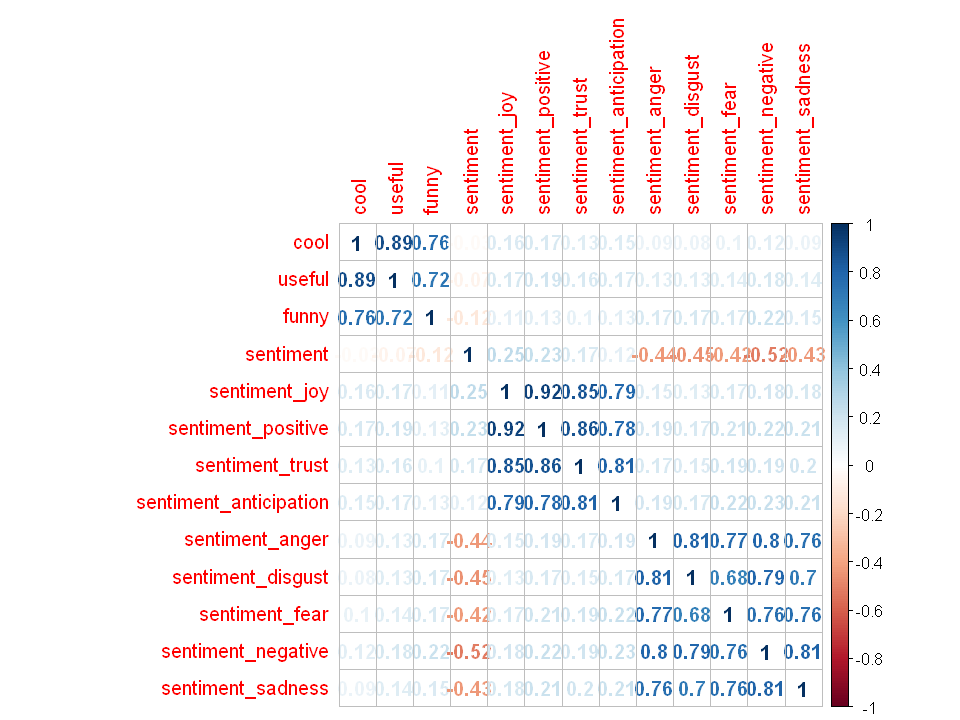

In [65]:
options(repr.plot.width=8, repr.plot.height=6)
corrplot::corrplot(cor(select_if(yelp,is.numeric)),method = "number")

All the sentiment words are related to ratings, but there is a strong amount of inter correlation too, that are grouped togeather as mainly positive and negative emotions, thus, only those are kept and other word variables are dropped

In [66]:
yelp <- yelp[,-c(10,12:16,18)]

### Building the model
For this model, we will run KNN, rpart (desicion tree) and Random Forest

Removing the variables that will overfit the data

In [67]:
FA <- yelp[,-c(1,2,4,5)]
FA$stars <- as.factor(FA$stars)

Inorder to preserve the proportion of contribution of all groups a stratified random sampling is used

In [68]:
library(rsample)

table(FA$stars)

set.seed(123)
split <- initial_split(FA, prop = .7, strata = "stars")
train <- training(split)
test <- testing(split)


   1    2    3    4    5 
 658  809 1278 3131 2931 

Setting parameters and building the ML models

In [70]:
control <- trainControl(method = "cv", number = 10)

model1 <- train(stars~.,data = train,method = "knn",metric = "Accuracy",tuneLength = 5,trControl = control, preProcess="scale")
model1

model2 <- train(stars~.,data = train,method = "rpart",metric = "Accuracy",tuneLength = 5,trControl = control, preProcess="scale")
model2

control <- trainControl(method = "repeatedcv", number = 5)
model3 <- train(stars~.,data = train,method = "rf",metric = "Accuracy",tuneLength = 5,trControl = control, preProcess="scale")
model3

k-Nearest Neighbors 

6166 samples
   6 predictor
   5 classes: '1', '2', '3', '4', '5' 

Pre-processing: scaled (6) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5550, 5550, 5548, 5550, 5550, 5547, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa     
   5  0.3554976  0.08969417
   7  0.3639282  0.09612011
   9  0.3627918  0.09132157
  11  0.3687854  0.09668969
  13  0.3666827  0.09179807

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 11.

CART 

6166 samples
   6 predictor
   5 classes: '1', '2', '3', '4', '5' 

Pre-processing: scaled (6) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5552, 5549, 5547, 5550, 5548, 5549, ... 
Resampling results across tuning parameters:

  cp           Accuracy   Kappa     
  0.002013592  0.4012399  0.13887546
  0.002391140  0.3997764  0.13750934
  0.011074755  0.4031850  0.14368579
  0.014346841  0.3984846  0.14578713
  0.031084823  0.3592281  0.02700401

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.01107475.

Random Forest 

6166 samples
   6 predictor
   5 classes: '1', '2', '3', '4', '5' 

Pre-processing: scaled (6) 
Resampling: Cross-Validated (5 fold, repeated 1 times) 
Summary of sample sizes: 4932, 4933, 4932, 4934, 4933 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.3806334  0.1109955
  3     0.3710668  0.1076365
  4     0.3647428  0.1027906
  5     0.3623073  0.1026418
  6     0.3621466  0.1049788

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

A confusion matrix is built for all the above models

In [72]:
aa <- predict(model1,test)
confusionMatrix(aa,test$stars)

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5
         1  75  45  24  24  24
         2  38  30  16  19  19
         3  23  31  38  48  47
         4  44  85 167 471 394
         5  22  46 144 376 391

Overall Statistics
                                         
               Accuracy : 0.3805         
                 95% CI : (0.362, 0.3994)
    No Information Rate : 0.3552         
    P-Value [Acc > NIR] : 0.003549       
                                         
                  Kappa : 0.1162         
 Mcnemar's Test P-Value : < 2.2e-16      

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity           0.37129  0.12658  0.09769   0.5021   0.4469
Specificity           0.95203  0.96173  0.93384   0.5948   0.6670
Pos Pred Value        0.39062  0.24590  0.20321   0.4057   0.3994
Neg Pred Value        0.94814  0.91782  0.85697   0.6845   0.7088
Prevalence            0.07649  0.08974  0.14729   0.

Model 1 is a KNN model and has an average accuraccy of 0.3851. Overall the sensitivity scores are really low. The accuracy score for each individual class is fair

In [73]:
aa <- predict(model2,test)
confusionMatrix(aa,test$stars)

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5
         1 101  63  34  24  25
         2   0   0   0   0   0
         3   0   0   0   0   0
         4  98 158 278 546 414
         5   3  16  77 368 436

Overall Statistics
                                          
               Accuracy : 0.4101          
                 95% CI : (0.3912, 0.4291)
    No Information Rate : 0.3552          
    P-Value [Acc > NIR] : 2.989e-09       
                                          
                  Kappa : 0.1312          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity           0.50000  0.00000   0.0000   0.5821   0.4983
Specificity           0.94014  1.00000   1.0000   0.4433   0.7373
Pos Pred Value        0.40891      NaN      NaN   0.3655   0.4844
Neg Pred Value        0.95781  0.91026   0.8527   0.6582   0.7478
Prevalence            0.07649  0.08974   0.1

Model 2 is a Desicion Tree model and has an average accuracy of 0.4089. But in the model there is no prediction for 3 star ratings. Sensitivity for 3 stars is zero. For this reason this model cannot be relied upon even if it has better accuracy.

In [74]:
aa <- predict(model3,test)
confusionMatrix(aa,test$stars)

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5
         1  92  47  35  27  20
         2  27  35  21  22  22
         3  19  15  17  36  28
         4  46 108 217 512 412
         5  18  32  99 341 393

Overall Statistics
                                          
               Accuracy : 0.3972          
                 95% CI : (0.3785, 0.4162)
    No Information Rate : 0.3552          
    P-Value [Acc > NIR] : 4.122e-06       
                                          
                  Kappa : 0.1363          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity           0.45545  0.14768 0.043702   0.5458   0.4491
Specificity           0.94711  0.96173 0.956483   0.5402   0.7225
Pos Pred Value        0.41629  0.27559 0.147826   0.3954   0.4451
Neg Pred Value        0.95455  0.91965 0.852732   0.6835   0.7258
Prevalence            0.07649  0.08974 0.147

Model 3 is a Random Forest model and has an average accuracy of 0.3959. This model also has better sensitivity and specificity scores than the others.

The important variables are found using the VarImp plot

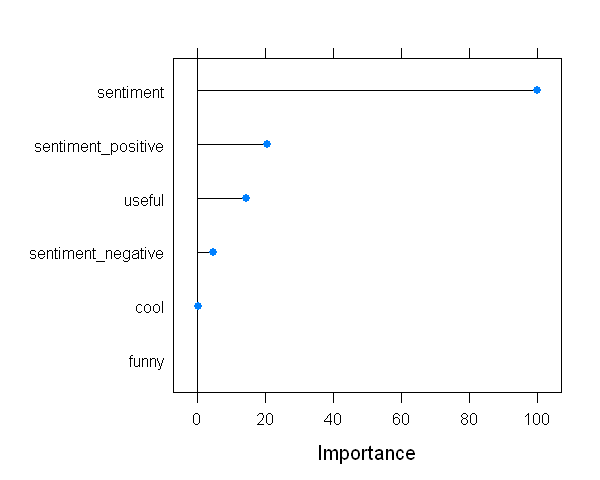

In [76]:
options(repr.plot.width=5, repr.plot.height=4)
plot(caret::varImp(model3))

This model says that the sentiment scores are highly important than the rest of the variables. The intense amount of missing values in cool, funny and useful have contributed nothing to the model. Most of the predictions were made with the help of the sentiment scores.If there are more information about the reviwe, the cuisine, hotel location, etc, they could have acted as better predictors of the ratings than just the reviews.